In [19]:
import pandas as pd 
import config
import plotly.express as px
import plotly.offline as pyo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
pd.set_option('display.max_rows', 500)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
px.set_mapbox_access_token("pk.eyJ1IjoidG9ueXBhcmswMDEiLCJhIjoiY2t2dWVramFmODZqaDJucXBrbnhpZ2JreCJ9.-XXf1YI8YESgWbWODhZAZA")
pd.set_option('display.max_columns', 500)

In [512]:
df = pd.read_csv("/Users/tonypark/Desktop/machine-learning-housing-project/communal/Ames_Housing_Price_Data_cleaned_2.csv")
pd.set_option('display.max_columns', None)
px.set_mapbox_access_token("pk.eyJ1IjoidG9ueXBhcmswMDEiLCJhIjoiY2t2dWVramFmODZqaDJucXBrbnhpZ2JreCJ9.-XXf1YI8YESgWbWODhZAZA")

In [513]:
df.drop("lot_bucket", axis=1, inplace = True)
df.drop("Prop_Addr", axis=1, inplace = True)
df.drop("mean_LotFrontage", axis=1, inplace = True)

In [514]:
df["GarageYrBlt"][df["GarageYrBlt"] == 'None'] = np.nan
df["GarageYrBlt"] = df["GarageYrBlt"].astype("float")

#if garage year build is na, replace with when house was built
#df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["YearBuilt"])
df.drop("GarageYrBlt", inplace=True, axis=1)

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Lasso without Feature Engineering

In [224]:
df["log_SalePrice"] = np.log(df["SalePrice"])

X = df.drop(["SalePrice","PID", "log_SalePrice"], axis=1)
y = df["log_SalePrice"]

In [357]:
#dummify X
X = pd.get_dummies(X, drop_first=True)

In [358]:
#min max scale the variables 
xscaler = MinMaxScaler()
x_train = xscaler.fit_transform(x_train)
x_test = xscaler.transform(x_test)

In [359]:
#test train split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [263]:
clf = linear_model.Lasso()

parameters = {'alpha':np.linspace(0.00001, 1000, 100), 
             }
gs = GridSearchCV(
    linear_model.Lasso(max_iter=1000), 
    parameters, 
    verbose= 3, 
    cv = 5,
    scoring='r2'
)


In [275]:
testr2 = []
trainr2 = []
clf = linear_model.Lasso(max_iter=2000)
for alpha in np.linspace(0.00001, 1000, 100):
    clf.set_params(alpha= alpha)
    clf.fit(x_train, y_train)
    trainr2.append(clf.score(x_train, y_train))
    testr2.append(clf.score(x_test, y_test))


/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.390e+00, tolerance: 2.769e-02



In [ ]:
list(zip(list(gs.best_estimator_.coef_), list(X.columns)))

In [565]:
##MSE 
mean_squared_error(gs.predict(xscaler.transform(x_test)), y_test)

/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



9232246759.990479

In [279]:
##get feature importance 
co  = list(zip(list(gs.best_estimator_.coef_), list(X.columns)))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## Feature Cleaning & Engineering

In [515]:
df["SaleCondition"] = df["SaleCondition"].apply(lambda v: "Normal" if v=="Normal" else "Abnormal")

In [516]:
#drop PID 
df.drop("PID", axis=1, inplace=True)

In [517]:
#remove outliers 
df.drop([115, 132, 141, 335, 490, 538, 2047, 2239], inplace=True) 

In [365]:
# #categorize neighborhoods 
# df =df.replace("Landmrk", "OldTown")
# df =df.replace("GrnHill", "OldTown")
# df =df.replace("NoRidge", "Somerst")
# df =df.replace("StoneBr", "Somerst")
# df =df.replace("NWAmes", "Gilbert")
# df =df.replace("Veenker", "Somerst")
# df =df.replace("NridgHt", "Somerst")
# df =df.replace("Blmngtn", "Gilbert")
# df =df.replace("Sawyer", "OldTown")
# df =df.replace("Edwards", "OldTown")
# df =df.replace("BrkSide", "OldTown")
# df =df.replace("SWISU", "OldTown")
# df =df.replace("CollgCr", "SawyerW")
# df =df.replace("Crawfor", "Timber")
# df =df.replace("Blueste", "OldTown")
# df =df.replace("ClearCr", "SawyerW")
# df =df.replace("IDOTRR", "OldTown")
# df =df.replace("BrDale", "NAmes")
# df =df.replace("NPkVill", "NAmes")
# df =df.replace("Greens", "Somerst")
# df =df.replace("MeadowV", "OldTown")

In [230]:
# #convert MoSold to object to be dummified 
# df["MoSold"]=df["MoSold"].astype("str")
# df.drop("YrSold", inplace=True, axis=1)

In [110]:
#identify categorical vs numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = list(df.select_dtypes(include=numerics).columns)
categorical_columns =list(df.drop(numeric_columns, axis=1).columns)


In [518]:
#number of bathrooms
df["Num_of_Bath"] = df["BsmtFullBath"] + 0.5* df["BsmtHalfBath"] + df["FullBath"] + 0.5*df["HalfBath"]
df.drop(["FullBath", 'BsmtFullBath',"BsmtHalfBath","HalfBath"], axis=1, inplace=True)


In [137]:
#Grouping Neighborhoods by Kmeans
kmeans = KMeans(max_iter = 10000, verbose = 3, random_state = 1)
neigh_df = df[["Neighborhood","GrLivArea", "OverallQual", "OverallCond"]]
neigh_df= pd.get_dummies(neigh_df, drop_first=True)

In [138]:
#Analyzing grouping of neighborhoods
cluster_list = [2,3,4,5,6,7,8,9,10,11,12,13,14]

score = []
for cluster in cluster_list:
    kmeans.set_params(n_clusters=cluster)
    kmeans.fit(neigh_df)  
    score.append(kmeans.inertia_)
    

Initialization complete
Iteration 0, inertia 356458643.39221966
Iteration 1, inertia 280388253.49767995
Iteration 2, inertia 257639362.547109
Iteration 3, inertia 248213425.04885656
Iteration 4, inertia 243441564.0073328
Iteration 5, inertia 241544858.34242782
Iteration 6, inertia 241158992.13083512
Iteration 7, inertia 240931553.68561277
Iteration 8, inertia 240803486.58718944
Iteration 9, inertia 240757044.0870782
Iteration 10, inertia 240709002.55201972
Iteration 11, inertia 240673761.64789212
Iteration 12, inertia 240669676.53915536
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 277210795.14031494
Iteration 1, inertia 241255270.26402783
Iteration 2, inertia 241034484.71214914
Iteration 3, inertia 240840928.24060214
Iteration 4, inertia 240761806.55727082
Iteration 5, inertia 240719201.60040602
Iteration 6, inertia 240678584.6341669
Iteration 7, inertia 240670698.19705895
Iteration 8, inertia 240669676.53915536
Converged at iteration 8: s

Iteration 0, inertia 100689307.79560645
Iteration 1, inertia 93081650.24238253
Iteration 2, inertia 89231528.10366973
Iteration 3, inertia 85221805.87341717
Iteration 4, inertia 82893960.98932388
Iteration 5, inertia 81319973.65647723
Iteration 6, inertia 79887167.06478435
Iteration 7, inertia 78477244.23383391
Iteration 8, inertia 77786488.0113783
Iteration 9, inertia 76921120.45080304
Iteration 10, inertia 76293051.34278521
Iteration 11, inertia 75808831.9958623
Iteration 12, inertia 75538326.1495112
Iteration 13, inertia 75407543.69271788
Iteration 14, inertia 75340411.37563805
Iteration 15, inertia 75198482.1644143
Iteration 16, inertia 74964357.26922041
Iteration 17, inertia 74674808.45725703
Iteration 18, inertia 74451119.98661797
Iteration 19, inertia 74289677.69695455
Iteration 20, inertia 74191382.13070822
Iteration 21, inertia 74135652.67252639
Iteration 22, inertia 74085140.10330491
Iteration 23, inertia 74025621.31169161
Iteration 24, inertia 73997432.67278744
Iteration 25,

Iteration 6, inertia 53522314.60221969
Iteration 7, inertia 53479548.88829
Iteration 8, inertia 53439772.65376042
Iteration 9, inertia 53401839.3675088
Iteration 10, inertia 53358958.91121475
Iteration 11, inertia 53320270.30778467
Iteration 12, inertia 53252079.73916632
Iteration 13, inertia 53205598.148761034
Iteration 14, inertia 53134981.61478551
Iteration 15, inertia 52927470.63689227
Iteration 16, inertia 52802978.64220019
Iteration 17, inertia 52753831.54283446
Iteration 18, inertia 52722596.07976495
Iteration 19, inertia 52681793.56061881
Iteration 20, inertia 52590600.64103462
Iteration 21, inertia 52554657.64920978
Iteration 22, inertia 52523449.737066224
Iteration 23, inertia 52465035.18211785
Iteration 24, inertia 52400488.37756543
Iteration 25, inertia 52359987.505449414
Iteration 26, inertia 52307610.93185143
Iteration 27, inertia 52288349.7445642
Iteration 28, inertia 52256451.47507341
Iteration 29, inertia 52243345.785273656
Iteration 30, inertia 52235451.31337639
Itera

Iteration 12, inertia 40754114.05297604
Iteration 13, inertia 40752436.55983943
Iteration 14, inertia 40750802.15365327
Iteration 15, inertia 40747972.029549144
Iteration 16, inertia 40746159.28569928
Iteration 17, inertia 40742832.90312592
Iteration 18, inertia 40738719.54789503
Iteration 19, inertia 40691635.659130156
Iteration 20, inertia 40632895.10600984
Iteration 21, inertia 40620150.21659612
Iteration 22, inertia 40611942.833594225
Iteration 23, inertia 40609175.24615763
Iteration 24, inertia 40605827.62135539
Iteration 25, inertia 40604352.3480839
Converged at iteration 25: center shift 0.46347968026978503 within tolerance 0.7962583122034886.
Initialization complete
Iteration 0, inertia 48218201.58017866
Iteration 1, inertia 40534667.33677729
Iteration 2, inertia 39555725.13498226
Iteration 3, inertia 38951983.71754321
Iteration 4, inertia 38747610.9418523
Iteration 5, inertia 38695187.815844364
Iteration 6, inertia 38669667.686157316
Iteration 7, inertia 38663234.27882442
Iter

Iteration 7, inertia 36091047.34663695
Iteration 8, inertia 36086412.12628629
Iteration 9, inertia 36079867.654659204
Iteration 10, inertia 36070341.391538695
Iteration 11, inertia 36068651.347517826
Iteration 12, inertia 36066160.38695119
Iteration 13, inertia 36064410.07332438
Iteration 14, inertia 36063797.69418902
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 37532590.428151995
Iteration 1, inertia 31247195.060692646
Iteration 2, inertia 29785705.270312984
Iteration 3, inertia 29093100.811866604
Iteration 4, inertia 28725234.104642604
Iteration 5, inertia 28458565.848621245
Iteration 6, inertia 28246176.874018706
Iteration 7, inertia 28102031.966381863
Iteration 8, inertia 28046350.222020935
Iteration 9, inertia 28029186.011967547
Iteration 10, inertia 28028178.830680594
Converged at iteration 10: center shift 0.15753536986437877 within tolerance 0.7962583122034886.
Initialization complete
Iteration 0, inertia 55141462.42856125
Iteratio

Initialization complete
Iteration 0, inertia 28092335.937454794
Iteration 1, inertia 24789575.21755141
Iteration 2, inertia 23972040.079316296
Iteration 3, inertia 23588111.29173205
Iteration 4, inertia 23252976.79422919
Iteration 5, inertia 22911240.011295356
Iteration 6, inertia 22766218.224024966
Iteration 7, inertia 22702384.147284925
Iteration 8, inertia 22650775.142042764
Iteration 9, inertia 22613247.688005596
Iteration 10, inertia 22599841.086148202
Iteration 11, inertia 22599454.786009103
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 29427355.700558834
Iteration 1, inertia 26540347.263919845
Iteration 2, inertia 25285538.877871074
Iteration 3, inertia 24483612.417252377
Iteration 4, inertia 23897455.31535942
Iteration 5, inertia 23447317.73107765
Iteration 6, inertia 22931055.17870026
Iteration 7, inertia 22674059.926913533
Iteration 8, inertia 22574413.987724036
Iteration 9, inertia 22514251.733797755
Iteration 10, inertia 2246101

Iteration 11, inertia 18620536.618057687
Iteration 12, inertia 18617275.403199974
Iteration 13, inertia 18616777.898300383
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 27552347.155372586
Iteration 1, inertia 21224026.929928698
Iteration 2, inertia 19586326.443507746
Iteration 3, inertia 18804478.36738629
Iteration 4, inertia 18473470.9699468
Iteration 5, inertia 18328799.086527243
Iteration 6, inertia 18238700.77378333
Iteration 7, inertia 18177676.149053767
Iteration 8, inertia 18086546.410750926
Iteration 9, inertia 18043645.120718945
Iteration 10, inertia 18001386.593550317
Iteration 11, inertia 17989338.950789534
Iteration 12, inertia 17978417.750402953
Iteration 13, inertia 17971023.852094963
Iteration 14, inertia 17960201.163104758
Iteration 15, inertia 17933735.64984098
Iteration 16, inertia 17916378.399242204
Iteration 17, inertia 17889144.874299802
Iteration 18, inertia 17845557.541296337
Iteration 19, inertia 17824713.67454737
It

Iteration 9, inertia 15469750.612591721
Iteration 10, inertia 15453589.026994664
Iteration 11, inertia 15442174.231385803
Iteration 12, inertia 15431690.400798745
Iteration 13, inertia 15418330.576556511
Iteration 14, inertia 15407752.049930952
Iteration 15, inertia 15401640.241367005
Iteration 16, inertia 15397054.493757728
Iteration 17, inertia 15394488.805411309
Iteration 18, inertia 15390432.09029088
Iteration 19, inertia 15387317.39193916
Iteration 20, inertia 15380455.46848572
Iteration 21, inertia 15373022.11938339
Iteration 22, inertia 15371852.070912987
Iteration 23, inertia 15369177.373432526
Iteration 24, inertia 15367477.114717897
Iteration 25, inertia 15365637.146020915
Converged at iteration 25: center shift 0.3416013657593635 within tolerance 0.7962583122034886.
Initialization complete
Iteration 0, inertia 21331009.13244436
Iteration 1, inertia 15643901.79098161
Iteration 2, inertia 15022129.59485501
Iteration 3, inertia 14925921.345772706
Iteration 4, inertia 14891718.2

Iteration 2, inertia 13487690.098338574
Iteration 3, inertia 13418990.575449705
Iteration 4, inertia 13375620.730588842
Iteration 5, inertia 13335776.573922647
Iteration 6, inertia 13246590.498111995
Iteration 7, inertia 13185115.271890022
Iteration 8, inertia 13147228.574402701
Iteration 9, inertia 13102680.386237532
Iteration 10, inertia 13049595.382848788
Iteration 11, inertia 13010958.484731346
Iteration 12, inertia 12990481.116494298
Iteration 13, inertia 12968319.323737709
Iteration 14, inertia 12950902.167596858
Iteration 15, inertia 12935913.467776004
Iteration 16, inertia 12919719.99047647
Iteration 17, inertia 12909297.600854198
Iteration 18, inertia 12900711.464063598
Iteration 19, inertia 12896227.796911895
Iteration 20, inertia 12894421.906099966
Iteration 21, inertia 12893561.625773743
Iteration 22, inertia 12878659.709553314
Iteration 23, inertia 12872805.507007089
Iteration 24, inertia 12869680.916963212
Iteration 25, inertia 12867601.58809498
Iteration 26, inertia 1286

Iteration 13, inertia 13001091.093779465
Iteration 14, inertia 12999148.900149576
Iteration 15, inertia 12989972.933738599
Iteration 16, inertia 12988403.97404462
Iteration 17, inertia 12987703.15910963
Iteration 18, inertia 12987384.277119994
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 15688881.038429346
Iteration 1, inertia 14198618.02494549
Iteration 2, inertia 13904007.81768219
Iteration 3, inertia 13742767.957710521
Iteration 4, inertia 13651602.251905536
Iteration 5, inertia 13603632.99986054
Iteration 6, inertia 13557785.896212433
Iteration 7, inertia 13524080.02617811
Iteration 8, inertia 13511271.628370972
Iteration 9, inertia 13500672.705985967
Iteration 10, inertia 13489330.055947056
Iteration 11, inertia 13479777.126948748
Iteration 12, inertia 13477718.893972607
Iteration 13, inertia 13474005.615923312
Iteration 14, inertia 13464279.657806156
Iteration 15, inertia 13455656.80895801
Iteration 16, inertia 13451785.616324088
Ite

Iteration 1, inertia 12356202.015141957
Iteration 2, inertia 11955699.14135431
Iteration 3, inertia 11782136.475006651
Iteration 4, inertia 11677572.627157982
Iteration 5, inertia 11527530.704162568
Iteration 6, inertia 11341579.67602771
Iteration 7, inertia 11286514.950584196
Iteration 8, inertia 11231549.112744074
Iteration 9, inertia 11155971.036152245
Iteration 10, inertia 11074189.548735252
Iteration 11, inertia 11010328.579485388
Iteration 12, inertia 10963616.435849525
Iteration 13, inertia 10926134.318798658
Iteration 14, inertia 10901871.690392543
Iteration 15, inertia 10881704.342759266
Iteration 16, inertia 10864812.190740107
Iteration 17, inertia 10850452.63878528
Iteration 18, inertia 10844037.17905917
Iteration 19, inertia 10840749.592510272
Iteration 20, inertia 10838965.055493686
Iteration 21, inertia 10837792.467216088
Iteration 22, inertia 10835684.398249574
Iteration 23, inertia 10826240.095051099
Iteration 24, inertia 10824451.526682436
Iteration 25, inertia 1082375

Initialization complete
Iteration 0, inertia 11174982.547084115
Iteration 1, inertia 10556554.609866723
Iteration 2, inertia 10311953.769879632
Iteration 3, inertia 10183967.196665792
Iteration 4, inertia 10106069.495213104
Iteration 5, inertia 10069439.517541206
Iteration 6, inertia 10053785.752345223
Iteration 7, inertia 10041052.942415703
Iteration 8, inertia 10033292.280936513
Iteration 9, inertia 10019751.768676123
Iteration 10, inertia 10007941.843352985
Iteration 11, inertia 10003636.168393984
Iteration 12, inertia 10001410.434526026
Iteration 13, inertia 9998298.248365888
Iteration 14, inertia 9996740.493406627
Iteration 15, inertia 9993647.057281155
Iteration 16, inertia 9991355.631736612
Iteration 17, inertia 9987765.079674965
Iteration 18, inertia 9985786.642858723
Iteration 19, inertia 9984042.657893704
Iteration 20, inertia 9980872.536856888
Iteration 21, inertia 9979249.186740078
Iteration 22, inertia 9978189.2643445
Iteration 23, inertia 9975473.782157915
Iteration 24, i

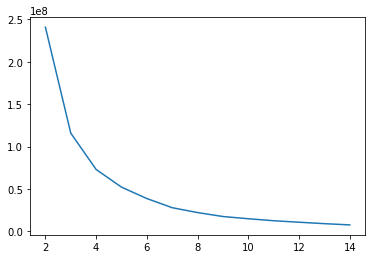

In [139]:
#plot elbow curve
plt.plot(cluster_list,score)

In [140]:
#fit kmeans based on optimal number of groups 
kmeans.set_params(n_clusters = 7)
kmeans.fit(neigh_df)


Initialization complete
Iteration 0, inertia 43348523.463792786
Iteration 1, inertia 31960404.57503621
Iteration 2, inertia 31010793.080872566
Iteration 3, inertia 30780155.905392546
Iteration 4, inertia 30679931.961325675
Iteration 5, inertia 30481173.87824679
Iteration 6, inertia 30306192.87743148
Iteration 7, inertia 30183812.16066908
Iteration 8, inertia 29951912.09732185
Iteration 9, inertia 29723829.557703108
Iteration 10, inertia 29643560.415279098
Iteration 11, inertia 29515905.841121435
Iteration 12, inertia 28837772.433628015
Iteration 13, inertia 28290992.25638003
Iteration 14, inertia 28158675.29632132
Iteration 15, inertia 28088808.32747225
Iteration 16, inertia 28051677.229346503
Iteration 17, inertia 28018666.889042687
Iteration 18, inertia 28009844.46990269
Iteration 19, inertia 28001915.406716324
Iteration 20, inertia 27997953.146442626
Iteration 21, inertia 27986663.257771917
Iteration 22, inertia 27979210.475407556
Iteration 23, inertia 27963293.78316811
Iteration 24

KMeans(max_iter=10000, n_clusters=7, random_state=1, verbose=3)

In [141]:
#add cluster to training dataframe
df["cluster"] = kmeans.labels_

In [144]:
#dummify clusters
df["cluster"] = df["cluster"].astype("str")

In [ ]:
#drop neighborhood
# df.drop("Neighborhood", inplace=True, axis=1)

In [519]:
#drop lat and long 
df.drop(["lat","long"], axis=1, inplace=True)

#has a second floor

#has a pool 

#has a garage

#has a basement 

#has a fireplace


#take the log of grLivARea
df["log_GrLivArea"] = np.log(df["GrLivArea"])
df.drop("GrLivArea", axis=1, inplace=True)

#total_living_SF
# df["square_footage_1"] = df["GrLivArea"] + df["TotalBsmtSF"] + df["GarageArea"]

#OverallQual * OverallCond 
# df["total_cond"] = df["OverallQual"] * df["OverallCond"]
# df.drop(["OverallQual","OverallCond"], axis=1, inplace=True)


#dropping all square footage that add up to grlivearea
# df.drop(["1stFlrSF", "2ndFlrSF", "BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF"], inplace=True, axis=1)
# df.drop(["BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF"], inplace=True, axis=1)


In [520]:
##ordinal categorie
dict_1 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1, 'None':0}
dict_2 = {'Gd':4, 'Av':3, 'Mn':2, 'No':1,'None':0}
dict_3 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0}
df["ExterQual"] = df["ExterQual"].apply(lambda x: dict_1[x])
df["ExterCond"] = df["ExterCond"].apply(lambda x: dict_1[x])
df["BsmtQual"] = df["BsmtQual"].apply(lambda x: dict_1[x])
df["BsmtCond"] = df["BsmtCond"].apply(lambda x: dict_1[x])
df["BsmtExposure"] = df["BsmtExposure"].apply(lambda x: dict_2[x])
df["BsmtFinType1"] = df["BsmtFinType1"].apply(lambda x: dict_3[x])
df["HeatingQC"] = df["HeatingQC"].apply(lambda x: dict_1[x])
df["KitchenQual"] = df["KitchenQual"].apply(lambda x: dict_1[x])
df["FireplaceQu"] = df["FireplaceQu"].apply(lambda x: dict_1[x])
df["GarageQual"] = df["GarageQual"].apply(lambda x: dict_1[x])
df["GarageCond"] = df["GarageCond"].apply(lambda x: dict_1[x])



## Lasso With Features Reduced and Engineered 

In [521]:
df["log_SalePrice"] = np.log(df["SalePrice"])

In [177]:
y = df["log_SalePrice"]

In [178]:
X = df.drop(["SalePrice","log_SalePrice"], axis=1)

In [179]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)

In [16]:
# xscaler = MinMaxScaler()
# x_train = xscaler.fit_transform(x_train)
# x_test = xscaler.transform(x_test)

In [150]:
lasso = linear_model.Lasso(max_iter = 1000)
trainR2= []
testR2 = []
alphas = np.linspace(1e-5, 1e-3,100)
for i ,alpha in enumerate(alphas):
    
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)
    xscaler = MinMaxScaler()
    x_train = xscaler.fit_transform(x_train)
    x_test = xscaler.transform(x_test)

    lasso.set_params(alpha = alpha)
    lasso.fit(x_train, y_train)
    

        
    trainR2.append(lasso.score(x_train, y_train))
    testR2.append(lasso.score(x_test, y_test))
    print(i, end = '\r')
        
    
best_alpha = alphas[np.argmax(testR2)]
lasso.set_params(alpha = best_alpha)

best_coefs = pd.Series(lasso.coef_, index = X.columns)

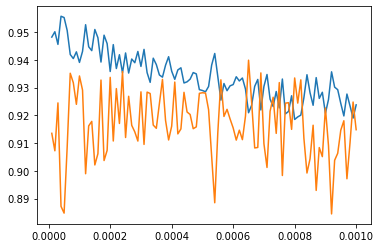

In [151]:
plt.plot(alphas, trainR2)
plt.plot(alphas, testR2)

In [162]:
lasso = linear_model.Lasso(max_iter = 20000)
trainR2= []
testR2 = []
alphas = np.linspace(1e-5, 1e-3,1000)
for i ,alpha in enumerate(alphas):
    
#     x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)
#     xscaler = MinMaxScaler()
#     x_train = xscaler.fit_transform(x_train)
#     x_test = xscaler.transform(x_test)
    x_train_avg = []
    x_test_avg = []
    
    for j in range(3):
        
        x_train, x_test, y_train, y_test = \
        train_test_split(X.to_numpy(),y.to_numpy(), test_size= 0.33)
        
        xscaler = MinMaxScaler()
        x_train = xscaler.fit_transform(x_train)
        x_test = xscaler.transform(x_test)
    
        lasso.set_params(alpha = alpha)
        lasso.fit(x_train, y_train)
        
        x_train_avg.append(lasso.score(x_train, y_train))
        x_test_avg.append(lasso.score(x_test, y_test))

        
    trainR2.append(np.mean(x_train_avg))
    testR2.append(np.mean(x_test_avg))
    print(i, end = '\r')
        
    
best_alpha = alphas[np.argmax(testR2)]
lasso.set_params(alpha = best_alpha)

best_coefs = pd.Series(lasso.coef_, index = X.columns)

    
    

KeyboardInterrupt: 

In [180]:
param = {
    "alpha":np.linspace(1e-5, 1e-3,1000)
}
lasso = linear_model.Lasso(max_iter = 20000)
gs = GridSearchCV(lasso, param, cv =5, verbose =3)
gs.fit(X, y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END .......................alpha=1e-05;, score=0.878 total time=   5.0s
[CV 2/5] END .......................alpha=1e-05;, score=0.928 total time=   2.0s
[CV 3/5] END .......................alpha=1e-05;, score=0.925 total time=   4.4s
[CV 4/5] END .......................alpha=1e-05;, score=0.934 total time=   3.3s
[CV 5/5] END .......................alpha=1e-05;, score=0.930 total time=   3.7s
[CV 1/5] END ......alpha=1.0990990990990992e-05;, score=0.878 total time=   5.4s
[CV 2/5] END ......alpha=1.0990990990990992e-05;, score=0.928 total time=   5.1s
[CV 3/5] END ......alpha=1.0990990990990992e-05;, score=0.925 total time=   6.0s
[CV 4/5] END ......alpha=1.0990990990990992e-05;, score=0.934 total time=   5.2s
[CV 5/5] END ......alpha=1.0990990990990992e-05;, score=0.931 total time=   3.6s
[CV 1/5] END ......alpha=1.1981981981981982e-05;, score=0.878 total time=   3.1s
[CV 2/5] END ......alpha=1.1981981981981982e

[CV 2/5] END .......alpha=2.981981981981982e-05;, score=0.929 total time=   2.9s
[CV 3/5] END .......alpha=2.981981981981982e-05;, score=0.927 total time=   2.6s
[CV 4/5] END .......alpha=2.981981981981982e-05;, score=0.935 total time=   1.9s
[CV 5/5] END .......alpha=2.981981981981982e-05;, score=0.934 total time=   2.5s
[CV 1/5] END .......alpha=3.081081081081081e-05;, score=0.880 total time=   1.5s
[CV 2/5] END .......alpha=3.081081081081081e-05;, score=0.929 total time=   2.9s
[CV 3/5] END .......alpha=3.081081081081081e-05;, score=0.927 total time=   3.0s
[CV 4/5] END .......alpha=3.081081081081081e-05;, score=0.935 total time=   1.9s
[CV 5/5] END .......alpha=3.081081081081081e-05;, score=0.935 total time=   2.5s
[CV 1/5] END ........alpha=3.18018018018018e-05;, score=0.880 total time=   1.7s
[CV 2/5] END ........alpha=3.18018018018018e-05;, score=0.929 total time=   3.3s
[CV 3/5] END ........alpha=3.18018018018018e-05;, score=0.927 total time=   4.2s
[CV 4/5] END ........alpha=3

[CV 4/5] END .......alpha=4.963963963963964e-05;, score=0.936 total time=   4.8s
[CV 5/5] END .......alpha=4.963963963963964e-05;, score=0.936 total time=   1.9s
[CV 1/5] END .......alpha=5.063063063063062e-05;, score=0.881 total time=   7.0s
[CV 2/5] END .......alpha=5.063063063063062e-05;, score=0.930 total time=   8.0s
[CV 3/5] END .......alpha=5.063063063063062e-05;, score=0.928 total time=   5.7s
[CV 4/5] END .......alpha=5.063063063063062e-05;, score=0.936 total time=   3.3s
[CV 5/5] END .......alpha=5.063063063063062e-05;, score=0.936 total time=   3.5s
[CV 1/5] END ......alpha=5.1621621621621615e-05;, score=0.881 total time=   4.9s


KeyboardInterrupt: 

In [152]:
y = lasso.set_params(alpha = alpha).fit(x_train, y_train)

In [153]:
sorted(list(zip(y.coef_, X.columns)), key=lambda x: abs(x[0]), reverse=True) 

[(1.001683879648604, 'log_GrLivArea'),
 (0.5164692247908479, 'OverallQual'),
 (0.27740732293863635, 'OverallCond'),
 (0.27227601446898775, 'TotalBsmtSF'),
 (0.17389160586488805, 'BsmtFinSF1'),
 (0.1572795245492192, 'YearBuilt'),
 (0.08586947041686205, 'GarageCars'),
 (0.07597029471490417, 'SaleType_New'),
 (0.07436114513001515, 'Num_of_Bath'),
 (0.07258666857926346, 'GarageArea'),
 (0.07089895429766732, 'Neighborhood_Somerst'),
 (0.06944949309179406, 'BsmtExposure_Gd'),
 (0.0662861829091881, 'CentralAir_Y'),
 (-0.06345842965210659, 'BldgType_Twnhs'),
 (0.059713043907743506, 'Neighborhood_Crawfor'),
 (-0.05730487837515833, 'MSSubClass'),
 (0.05640056188483666, 'YearRemodAdd'),
 (0.05077625920102781, 'Neighborhood_NridgHt'),
 (-0.050381344315351684, 'ExterCond_Fa'),
 (-0.04497307701295599, 'BldgType_Duplex'),
 (-0.04430780869978822, 'GarageCond_Fa'),
 (0.043207110009851654, 'MSZoning_RL'),
 (0.04163567544747928, 'Neighborhood_NoRidge'),
 (0.038729041462080276, 'cluster_3'),
 (0.038481118

In [154]:
max(testR2)

0.9398939874910232

In [155]:
max(trainR2)

0.9557457571840864

In [100]:
trainR2[np.argmax(testR2)]

0.9250731481145225

In [193]:
def calc_vif(data):
    vif = {}
    for feature in data.columns:
        X = [f for f in data.columns if f != feature]
        X = data[X]
        y = data[feature]
        r2 = linear_model.LinearRegression().fit(X,y).score(X,y)
        vif[feature] = 1/(1-r2)
    return pd.DataFrame.from_dict([vif]).T.sort_values(ascending = False, by = 0)

In [223]:
calc_vif(X[sorted_best_coefs[:20]["index"].values[:15]])

,0
square_footage_1,5.718855
GrLivArea,4.300150
OverallQual,3.085383
YearRemodAdd,1.900518
KitchenQual_TA,1.804537
Neighborhood_OldTown,1.759417
Neighborhood_Somerst,1.695000
HeatingQC_Ex,1.495640
GarageType_Attchd,1.480302
BsmtFinType1_GLQ,1.432999


## Gradient Boosting


In [537]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [538]:
le = LabelEncoder()

In [539]:
df["log_SalePrice"] = np.log(df["SalePrice"])

In [540]:
y = df["log_SalePrice"]

In [541]:
X = df.drop(["SalePrice","log_SalePrice"], axis=1)

In [542]:
string = X[X.columns[X.applymap(lambda x: isinstance(x, str)).all(0)]]

In [543]:
integer = X[X.columns[~X.columns.isin(list(string.columns))]]

In [529]:
#dummify
#X = pd.get_dummies(X, drop_first=True)


#lable encode
string_df = string.apply(le.fit_transform)

In [544]:
total_X = string_df.join(integer, how="outer")

In [545]:
x_train, x_test, y_train, y_test = train_test_split(total_X,y, test_size= 0.33)

In [546]:
### implement random
clf = GradientBoostingRegressor(random_state=0)

In [603]:
param_grid = {
    'max_depth': [4,5,6,7],
    'learning_rate': [0.1,0.2],
    'n_estimators': [800],
    'max_features':[16,30,45],
    'subsample':[0.85,0.9], 
    'alpha':[0.7,0.8,0.9,1]
}



In [596]:
cv = GridSearchCV(clf, param_grid = param_grid, verbose=3, cv=3)

In [382]:
np.sqrt(265)

16.278820596099706

In [391]:
max_depth_test = []
max_depth_train = []

for i in range(5,60):
    clf = GradientBoostingRegressor(random_state=0, max_features=i)
    clf.fit(x_train, y_train)
    max_depth_test.append(clf.score(x_test, y_test))
    max_depth_train.append(clf.score(x_train, y_train))

    print(i, end='\r')

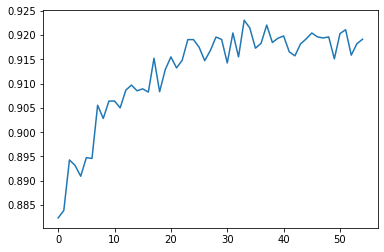

In [392]:
# plt.plot(max_depth_train)
plt.plot(max_depth_test)



In [565]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [597]:
cv.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=800, subsample=0.85;, score=0.923 total time=   5.3s
[CV 2/3] END learning_rate=0.1, max_depth=4, n_estimators=800, subsample=0.85;, score=0.896 total time=   4.9s
[CV 3/3] END learning_rate=0.1, max_depth=4, n_estimators=800, subsample=0.85;, score=0.905 total time=   5.0s
[CV 1/3] END learning_rate=0.1, max_depth=4, n_estimators=800, subsample=0.9;, score=0.918 total time=   6.5s
[CV 2/3] END learning_rate=0.1, max_depth=4, n_estimators=800, subsample=0.9;, score=0.895 total time=   6.4s
[CV 3/3] END learning_rate=0.1, max_depth=4, n_estimators=800, subsample=0.9;, score=0.902 total time=   5.6s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=800, subsample=0.85;, score=0.914 total time=   7.4s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=800, subsample=0.85;, score=0.899 total time=   9.2s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimat

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [4, 5, 6, 7],
                         'n_estimators': [800], 'subsample': [0.85, 0.9]},
             verbose=3)

In [604]:
cv.best_score_

0.9079581196604943

In [605]:
cv.best_score

AttributeError: 'GridSearchCV' object has no attribute 'best_score'

In [607]:
###ROC Curve Comparison 
clf.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(random_state=0)>

In [240]:
fig = px.scatter_mapbox(df[df["Neighborhood"]=="Crawfor"],
                        lat = "lat", 
                        lon = "long",
                        color= "SalePrice"
                        
                       )



fig.show()

In [210]:
prof = df[df['SalePrice'] < 476000]
prof = df[df['Neighborhood'].isin(['NoRidge','NridgHt'])]

In [211]:
prof = prof[prof['BldgType'] == '1Fam']
prof = prof[(prof['OverallQual'] > 6) & (prof['OverallCond'] > 6)]

In [213]:
print(len(prof))
prof.head()

4


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,YrSold,lat,long,TotalPorchSF
64,533135020,1755,235000,60,RL,82.5,11949,Reg,NoRidge,1Fam,2Story,7,8,1991,2008,VinylSd,BrkFace,196.0,Gd,Gd,PConc,Gd,TA,No,GLQ,601.0,216.0,158.0,975.0,Ex,Y,SBrkr,975,780,0,0.0,1.0,2,1,3,Gd,7,1,TA,Attchd,Unf,2.0,524.0,TA,TA,Y,502,7,2009,42.047304,-93.650094,60
876,528382020,2270,290000,60,RL,92.0,11764,IR1,NoRidge,1Fam,2Story,8,7,1999,2007,VinylSd,BrkFace,348.0,Gd,TA,PConc,Gd,TA,No,GLQ,524.0,0.0,628.0,1152.0,Ex,Y,SBrkr,1164,1106,0,0.0,0.0,2,1,4,Gd,9,1,Gd,Attchd,Fin,3.0,671.0,TA,TA,Y,132,4,2010,42.052801,-93.650700,57
963,528363020,2501,290000,60,RL,82.5,11929,IR1,NoRidge,1Fam,2Story,8,7,1995,1995,VinylSd,BrkFace,466.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,0.0,1242.0,1242.0,Ex,Y,SBrkr,1251,1250,0,0.0,0.0,2,1,4,Gd,9,1,TA,Attchd,RFn,3.0,751.0,TA,TA,Y,192,6,2008,42.050283,-93.656423,87
1199,528390100,2448,402000,60,RL,52.0,46589,IR2,NoRidge,1Fam,2Story,8,7,1994,2005,VinylSd,BrkFace,528.0,Gd,TA,PConc,Gd,Gd,No,GLQ,1361.0,180.0,88.0,1629.0,Ex,Y,SBrkr,1686,762,0,1.0,0.0,2,1,4,Gd,8,1,TA,Attchd,RFn,3.0,711.0,TA,TA,Y,517,7,2009,42.050320,-93.650403,76


In [214]:
isu = [42.0266573, -93.64982669999999]

In [218]:
from geopy import Point
from geopy.distance import geodesic

In [215]:
def distance(row, other_location):
    neighborhoodLocation = Point(row['lat'],row['long'])
    return round(geodesic(neighborhoodLocation,other_location).miles,2)

In [242]:
max_dist = 1.5

In [243]:
df["dist_to_isu"] = df.apply(lambda r: distance(r, isu), axis = 1)

In [244]:
professor = df[df["dist_to_isu"]<max_dist]

In [245]:
professor = professor[professor['SalePrice'] < 476000]

In [246]:
professor = professor[professor['BldgType'] == '1Fam']

In [247]:
professor = professor[(professor['OverallQual'] > 6) & (professor['OverallCond'] > 6)]

In [248]:
professor = professor[professor["BedroomAbvGr"]>=4]

In [249]:
professor

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MoSold,YrSold,lat,long,TotalPorchSF,dist_to_isu
531,909282030,3447,381000,50,RL,87.2,14100,IR1,Crawfor,1Fam,1.5Fin,8,9,1935,1997,Stucco,BrkFace,632.0,TA,Gd,CBlock,TA,TA,Mn,Rec,192.0,0.0,536.0,728.0,Ex,Y,SBrkr,1968,1479,0,0.0,0.0,3,1,4,Gd,11,2,Gd,BuiltIn,Unf,3.0,1014.0,TA,TA,Y,314,5,2008,42.015669,-93.642464,12,0.85
1083,904100140,2403,244400,70,RL,86.5,24090,Reg,ClearCr,1Fam,2Story,7,7,1940,1950,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Unf,0.0,0.0,1032.0,1032.0,Ex,Y,SBrkr,1207,1196,0,0.0,0.0,2,0,4,TA,10,2,TA,Attchd,Unf,1.0,349.0,TA,TA,Y,56,6,2010,42.033739,-93.657432,318,0.63
1171,909427230,2340,266500,70,RL,66.0,9042,Reg,Crawfor,1Fam,2Story,7,9,1941,2006,CemntBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,0.0,877.0,1152.0,Ex,Y,SBrkr,1188,1152,0,0.0,0.0,2,0,4,Gd,9,2,Gd,Attchd,RFn,1.0,252.0,TA,TA,Y,0,5,2010,42.014314,-93.642543,60,0.93
1309,534151120,2288,230000,60,RL,87.2,13774,IR1,NWAmes,1Fam,2Story,7,7,1977,1992,HdBoard,BrkFace,283.0,TA,Gd,PConc,Gd,TA,No,GLQ,432.0,0.0,476.0,908.0,Ex,Y,SBrkr,1316,972,0,0.0,0.0,1,2,4,Gd,8,2,TA,Attchd,RFn,2.0,520.0,TA,TA,Y,321,11,2009,42.042994,-93.637812,228,1.29
1356,903429080,1826,155000,70,RM,50.0,2500,Reg,OldTown,1Fam,2Story,7,8,1915,2005,Stucco,None,0.0,Gd,TA,PConc,TA,TA,No,ALQ,299.0,0.0,611.0,910.0,Ex,Y,SBrkr,916,910,0,1.0,0.0,1,1,4,Ex,7,1,Gd,Attchd,Unf,1.0,164.0,Fa,Fa,Y,0,6,2009,42.027985,-93.621345,0,1.47
2083,903456110,1952,212300,60,RM,60.0,9780,Reg,IDOTRR,1Fam,2Story,7,9,1950,2005,VinylSd,None,0.0,TA,Ex,CBlock,TA,TA,No,LwQ,354.0,398.0,224.0,976.0,Ex,Y,SBrkr,976,976,0,0.0,0.0,1,1,4,Gd,8,2,TA,Detchd,Fin,1.0,299.0,TA,TA,Y,285,4,2007,42.023340,-93.629597,216,1.07
2214,909275110,1718,238000,70,RL,60.0,7230,Reg,Crawfor,1Fam,2.5Unf,7,7,1927,1992,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,0.0,851.0,851.0,Gd,Y,SBrkr,867,851,0,0.0,0.0,2,1,4,Gd,8,1,TA,Detchd,Unf,2.0,264.0,TA,TA,Y,291,10,2007,42.018788,-93.642820,213,0.65
2374,909280070,1671,218000,50,RL,81.0,8170,IR1,Crawfor,1Fam,1.5Fin,7,7,1929,1950,Stucco,BrkFace,270.0,Gd,Gd,BrkTil,TA,TA,No,ALQ,526.0,0.0,496.0,1022.0,Ex,Y,FuseA,1122,549,0,0.0,0.0,2,0,4,TA,7,1,Gd,Detchd,Unf,2.0,451.0,TA,TA,Y,0,2,2006,42.016512,-93.642088,0,0.81


In [254]:
professor[["SalePrice","dist_to_isu","OverallQual", "OverallCond", "BedroomAbvGr"]]

,SalePrice,dist_to_isu,OverallQual,OverallCond,BedroomAbvGr
531,381000,0.85,8,9,4
1083,244400,0.63,7,7,4
1171,266500,0.93,7,9,4
1309,230000,1.29,7,7,4
1356,155000,1.47,7,8,4
2083,212300,1.07,7,9,4
2214,238000,0.65,7,7,4
2374,218000,0.81,7,7,4


In [50]:
fig = px.line_mapbox(professor,
                        lat = "lat", 
                        lon = "long"
                       )



fig.show()
# fig.write_image('case.png', engine='kaleido')

NameError: name 'professor' is not defined